# Analog-Digital Circuit Interfaces

### EE 16B: Designing Information Devices and Systems II, Summer 2020

Updated by Mia Mirkovic (2020)

miamirkovic@berkeley.edu

-----

## Table of Contents

* [Part 0: Lab Note](#part0)
* [Part 1: Digital to Analog Converters (DACs)](#part1)
* [Part 2: Analog to Digital Converters (ADCs)](#part2)

<a id='part0'></a>
# <span style="color:navy">Part 0: Lab Note</span>
-----

### Please read the [lab note](https://drive.google.com/file/d/11XFdF8O0T3PGzGejyiGF8z3hVolKgjos/view?usp=sharing).

<a id='part1'></a>
# <span style="color:navy">Part 1: Digital to Analog Converters (DACs)</span>
-----

<img style="width: 400px" src="imgs/lab2_r_2r.png">

## Questions

For the questions below, we assume we have an $n = 3$ bit DAC. Don't forget to show your GSI your work! (Hint: Superposition)

**<span style="color:#ba190f">Please do not spend too long on these questions. If you get stuck, ask for help.</span>**

**<span style="color:#075a04">1. Assuming [$V_0, V_1, V_2$] = [0,0,0] (all in volts), what is $V_{out}$?</span>**


0

**<span style="color:#075a04">2. Assuming [$V_0, V_1, V_2$] = [0,1,0], what is $V_{out}$?</span>**

1/4 Vref

**<span style="color:#075a04">3. Assuming [$V_0, V_1, V_2$] = [1,1,1], what is $V_{out}$?</span>**


7/8 Vref

**<span style="color:#075a04">4. Assuming [$V_0, V_1, V_2$] = [0,0,1], what is $V_{out}$?</span>**


1/2 Vref

## Materials
- MSP430 Launchpad + USB cable
- Jumper wires
- 1 k$\Omega$ resistors
- 2 k$\Omega$ resistors
- Red LED (you can try other colors, but red usually has the lowest on-voltage)
- Breadboard
- Multimeter

## Tasks

### 1.1. Build the 3-bit DAC

Use the diagram below to build a 3-bit DAC using the $1K\Omega$ and $2 K\Omega$ resistors. Use the jumper wires to connect the Launchpad to the circuit. For example `P4.1` below tells you to connect that node on the breadboard to pin `4.1` on the Launchpad. In this circuit, the Launchpad will act as a signal generator.

<img style="width: 400px" src="imgs/lab2_r_2r_pins.png">

### 1.2. Running the 3-bit DAC

**Make sure to connect the ground of your Launchpad with the ground of your circuit!**

- Open the file `dac.ino` in Energia and skim the code.
    - **What do you expect the output of the DAC to be?** This understanding is **vital** to the debugging process: if you don't know what you're looking for, how can you know if your result is correct or not?
- Adjust the `DELAY` variable in the code to your desired value. 
- Upload the code to your Launchpad. The code outputs an increasing and decreasing binary number in pins `2.7`, `4.2`, `4.1` where pin `4.1` is the least significant bit (LSB).
- Connect pin `6.0` to $V_{OUT}$.
- **Press the `RST` button on your Launchpad.**
- Observe the behavior of the LED. You might not see the LED turn on for the lower voltages. 
- Now, **remove the LED from your circuit**. Open the serial plotter. Does the output look like what you expect?

### 1.3  Recording your data

- Open the file `dac_data.ino` in Energia. Upload it to your Launchpad and hit `RST` after the code finishes uploading.
- Open the serial monitor (`Tools` > `Serial Monitor`) to read the voltage values at the output.
    - If you don't see anything, change to the other (reasonable) port (`Tools` > `Ports` > your port)
- Record the voltages for one full period (increasing and decreasing) in the cell below.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

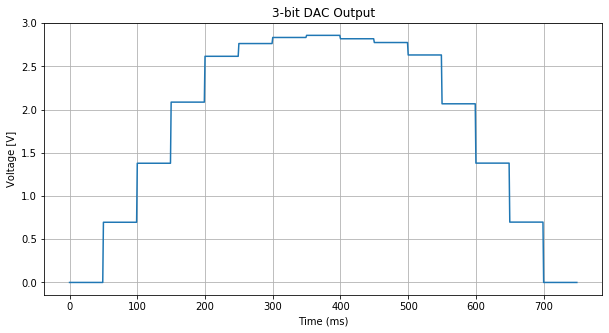

In [4]:
delay =  50 # your delay (in milliseconds) -- make it a value between 5 and 100

voltages = [0.0000000000,0.6963359832,1.3790981769,2.0861816406,2.6163654327,2.7638084888,2.8341606140,2.8586442947,2.8192785263,2.7756421566,2.6317434310,2.0668339729,1.3804085254,0.6979923248,0.0000000000] #fill in voltages here

#Plot Outputs
plt.figure(figsize=(10,5))
plt.grid()
vplot = np.concatenate([np.repeat(v,delay) for v in voltages])
plt.plot(vplot)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage [V]")
plt.title("3-bit DAC Output")
plt.show()

### 1.4. Build the 4-bit DAC
- **Modify both your circuit and the Launchpad code** to extend the 3-bit DAC to 4 bits.
    - **You should use pin `3.2` for the new most significant bit (MSB)**.
    - All you have to do to the code is change `BITS` to 4.
- Repeat the steps in 1.2 and 1.3 for the 4-bit DAC.

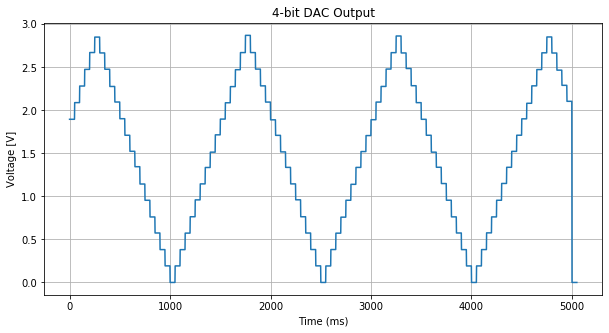

In [6]:
delay = 50 # your delay (in milliseconds) -- make it a value between 5 and 100

# voltages = [0.0000000000,0.3475647449,0.6896453380,1.0414717197,1.3727459907,1.7278884887,2.0646553039,2.4103398323,2.6155900955,2.6954925060,2.7520244121,2.7710041999,2.7899479866,2.8209323883,2.8451461791,2.8613495826,2.8357284545,2.8383743286,2.8059865951,2.7710041999,2.7386419773,2.7007360458,2.6105420589,2.4040188789,2.0644319057,1.7230050563,1.3708645105,1.0374245643,0.6893679618,0.3473629474,0.0000000000,0.3483852386,0.6876945018,1.0397543907,1.3739876747,1.7355091571,2.0636808872,2.4220793247,2.6116561889,2.7005105018,2.7545247077,2.7858366966,2.8033127784,2.8316429138,2.8330442428,2.8640472412,2.8317096710,2.8181395530,2.8045840263,2.7737009525,2.7480809688,2.7008862495,2.6064968109,2.4071443080,2.0733647346,1.7265128135,1.3759866952,1.0359585285,0.6907169818,0.3470349311,0.0000000000] #fill in voltages here
voltages = [1.8959632873,2.0896270275,2.2823202610,2.4758765697,2.6716256141,2.8510670661,2.6669890880,2.4774188995,2.2772552967,2.0965855121,1.9026745796,1.7103262901,1.5239360332,1.3449120521,1.1437013149,0.9548252105,0.7610749244,0.5746903419,0.3816314697,0.1926579475,0.0000000000,0.1921562385,0.3811347961,0.5731910705,0.7634649753,0.9595706939,1.1451944112,1.3358128070,1.5139421463,1.7152531147,1.8981969833,2.0877923965,2.2756106853,2.4722032546,2.6709275245,2.8712096214,2.6710755825,2.4790158271,2.2844071388,2.0959863662,1.8898021697,1.7092792987,1.5171084403,1.3371040821,1.1451959609,0.9603192329,0.7634649753,0.5742401599,0.3824810028,0.1927586174,0.0000000000,0.1916110420,0.3824331283,0.5725972175,0.7586384296,0.9550744056,1.1402759552,1.3368610143,1.5209421157,1.7065935134,1.8910015106,2.0958893299,2.2775728702,2.4796133041,2.6700809001,2.8637334823,2.6667466163,2.4860458374,2.2860569953,2.0893414020,1.8957202911,1.7103113174,1.5138982772,1.3384051322,1.1492476463,0.9555782318,0.7619680404,0.5746903419,0.3815320491,0.1917610168,0.0000000000,0.1920114898,0.3819300842,0.5761849880,0.7615207672,0.9550797462,1.1502988338,1.3380553722,1.5230901241,1.7107727527,1.9011989593,2.0819609165,2.2845623493,2.4737763404,2.6682388782,2.8525344848,2.6660006046,2.4669828414,2.2905409336,2.1047682762,0.0000000000]

#Plot Outputs
plt.figure(figsize=(10,5))
plt.grid()
vplot = np.concatenate([np.repeat(v,delay) for v in voltages])
plt.plot(vplot)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage [V]")
plt.title("4-bit DAC Output")
plt.show()

<a id='part2'></a>
# <span style="color:navy">Part 2: Analog to Digital Converters (ADCs)</span>
-----

## Materials
- MSP430 Launchpad + USB cable
- 1 k$\Omega$ resistors
- 2 k$\Omega$ resistors
- LMC6482 Op-amp
- Breadboard
- Multimeter

## Tasks

### 2.0. Read Part 2 of the [lab note](https://drive.google.com/file/d/11XFdF8O0T3PGzGejyiGF8z3hVolKgjos/view?usp=sharing).

### 2.1. Build the ADC

While we've already written the code for the ADC, you'll still need to make some changes to your circuit. Specifically, **you will need to build the analog input** (use a potentiometer to form a variable voltage divider between 3.3V and ground) and the part that compares the output of the DAC to the analog input and feeds the result of the comparison back to pin `6.5` on your launchpad (hint: it's the comparator). You've already built the 4-bit DAC, so just build the rest of the ADC around that. 

1. Build the analog input circuit shown in part 2 of the note in the section titled "The Potentiometer". 
    - When you turn the knob on the potentiometer, the voltage at the node labeled "analog input" should change. Probe that node with a multimeter and try it.
    
2. Complete the ADC as shown in the last image in Part 2 of the lab note. 

### 2.2. Run the ADC

- Open the file `sar_adc.ino` and skim the code. It reads from pin `6.5` and outputs the approximated result in pins `3.2`, `2.7`, `4.2`, `4.1` with pin `4.1` as the LSB.
- Use the potentiometer to control the input voltage (which ranges from 0V to 3.3V).
- Probe the input voltage with the multimeter and record it below.
- Check the binary output! To check the output, open the Serial Monitor in Energia (Control + Shift + M or `Tools > Serial Monitor`). **Make sure the serial monitor is at 9600 baud.**
    - Try turning the potentiometer and see what changes!
- Now, let's plot what's actually happening as we step through the SAR algorithm. Upload `sar_adc_plot.ino` to your Launchpad.
- Connect the DAC output to pin `6.0` on the Launchpad.
- Hit reset and open the serial plotter. What do you see? Try turning the potentiometer to change the analog input voltage. What happens?

  - **<span style="color:#ba190f">The graph should show something like this. Should your signal look exactly like this? Think about why the signal steps up and down when it does, and why it converges to this specific voltage (~1.4V).</span>**

<center>
<img style="width:600px" src="http://inst.eecs.berkeley.edu/~ee16b/fa15/lab_pics/adc-4.png"/>
</center>

### 2.3  Recording your data

- Open the file `sar_adc_data.ino` in Energia. Upload it to your Launchpad and hit `RST` after the code finishes uploading.
- Open the serial monitor (`Tools` > `Serial Monitor`) to read the voltage values at the output.
    - If you don't see anything, change to the other (reasonable) port (`Tools` > `Ports` > your port)
- Record the voltages for one full period in the cell below.
- Change the analog input voltage and plot the resulting data in the second cell below.


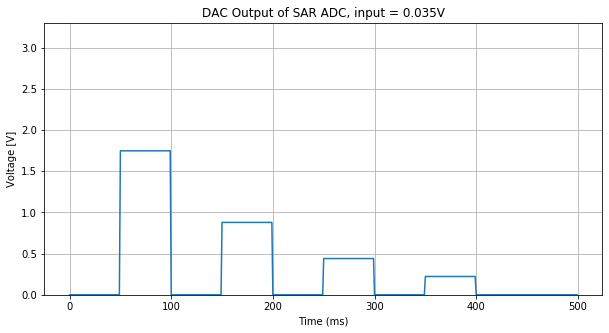

In [7]:
delay_ms = 50 # your delay (in milliseconds) -- make it a value between 5 and 100

analog_input =  0.035 # your input voltage here
voltages = [0.0000000000,1.7482244968,0.0000000000,0.8788511276,0.0000000000,0.4402872085,0.0000000000,0.2222976446,0.0000000000,0.000000000] #fill in voltages here

#Plot Outputs
plt.figure(figsize=(10,5))
plt.grid()
plt.ylim((0,3.3))
vplot = np.concatenate([np.repeat(v,delay_ms) for v in voltages])
plt.plot(vplot)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage [V]")
plt.title("DAC Output of SAR ADC, input = "+str(analog_input)+"V")
plt.show()

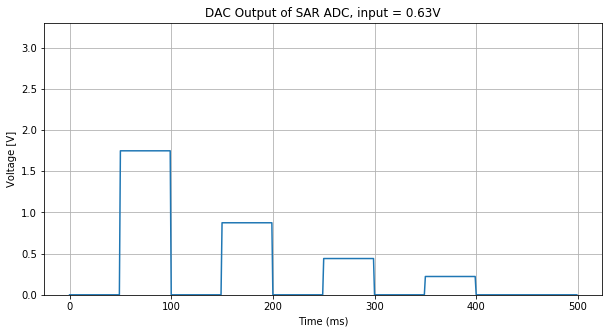

In [8]:
analog_input = 0.63 # your input voltage here
voltages = [0.0000000000,1.7482244968,0.0000000000,0.8745430946,0.0000000000,0.4402872085,0.0000000000,0.2222976446,0.0000000000,0.000000000] #fill in voltages here

#Plot Outputs
plt.figure(figsize=(10,5))
plt.grid()
plt.ylim((0,3.3))
vplot = np.concatenate([np.repeat(v,delay_ms) for v in voltages])
plt.plot(vplot)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage [V]")
plt.title("DAC Output of SAR ADC, input = "+str(analog_input)+"V")
plt.show()

## Questions

**<span style="color:#075a04">2.1. If we want to build a 4-bit ADC with a sampling frequency of 1kHz (read the input voltage 1000 times per second), what is the minimum clock frequency the ADC has to run at assuming it takes one clock cycle to set each bit in the ADC's register?</span>**



4000 Hz

**Take a look at the <a href="https://www.ti.com/lit/ds/symlink/tlc7524.pdf?HQS=TI-null-null-mousermode-df-pf-null-wwe&ts=1592345736692&ref_url=https%253A%252F%252Fwww.mouser.com%252F">datasheet</a> for the TLC7524 8-bit DAC.**

**<span style="color:#075a04">2.2. Look at the table of recommended operating conditions. Could we use this DAC with the Launchpad pins as the inputs? Why or why not?</span>**

Yes, because the launchpad supplies 3.3V and the minimum is 2.4V

**<span style="color:#075a04">2.2. What's different (aside from the number of bits) about the circuitry that converts the digital inputs (DB0-7 in the diagram on page 2) from the DAC you built? </span>**

The R/2R dividers are inverted 

**Look at the propagation delay and settling times given on page 1. Also, please read [this webpage](https://www.edn.com/precisely-measure-settling-time-to-1-ppm/) to better understand the meaning of these numbers. Let's say we want to build a SAR ADC using this DAC and some microprocessor. Assume the time between the microprocessor setting a bit value and the voltage actually appearing at one of the inputs (DB0-7) is at worst 100ns. Similarly, assume that the time it takes for the DAC output signal to travel through the comparator and be read into the microprocessor is at worst 150ns. **

**<span style="color:#075a04">2.3. What is the worst-case time required to set a bit in the ADC's register? </span>**

350e-9s

**<span style="color:#075a04">2.4. How long would it take in the worst case to see the correct ADC output? What is the maximum frequency at which we could sample the output voltage and still be absolutely certain that the value is correct? </span>**

about 2.8e-6s = 1/2.8e9=360 kHz

# <span style="color:#ba190f">CHECKOFF</span>
-----
- Complete <a href="https://forms.gle/Q5EM2x7suMKdAeVy7">this quiz</a>.
- Have your ADC running and be ready to explain how it works.
- Have all of the plots and <span style="color:#075a04"> green questions in the notebook completed</span>.

Don't forget to save this notebook somewhere all your group members can access it!